**Author**: Kodirjon Akhmedov

# Analyse tabular data of brain structure (on processed brain data)

In [1]:
#Libraries needed for our project
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.manifold import TSNE, Isomap
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
#
# Important libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from sklearn.feature_selection import VarianceThreshold
from keras import models
from keras import layers
import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
from keras.layers import Dropout
# Additionals
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

Using TensorFlow backend.


In [2]:
data1 = pd.read_csv("hcp_freesurfer.csv", index_col='Subject')
data1.shape

(1113, 937)

In [3]:
data1.head(2)

,Gender,Release,FS_InterCranial_Vol,FS_BrainSeg_Vol,FS_BrainSeg_Vol_No_Vent,FS_BrainSeg_Vol_No_Vent_Surf,FS_LCort_GM_Vol,FS_RCort_GM_Vol,FS_TotCort_GM_Vol,FS_SubCort_GM_Vol,...,FS_R_Rostralanteriorcingulate_CurvInd,FS_R_Rostralmiddlefrontal_CurvInd,FS_R_Superiorfrontal_CurvInd,FS_R_Superiorparietal_CurvInd,FS_R_Superiortemporal_CurvInd,FS_R_Supramarginal_CurvInd,FS_R_Frontalpole_CurvInd,FS_R_Temporalpole_CurvInd,FS_R_Transversetemporal_CurvInd,FS_R_Insula_CurvInd
Subject,,,,,,,,,,,,,,,,,,,,,
100206,M,S900,1.864518e+06,1406924.0,1389007.0,1.386836e+06,304488,305634,610122,70240,...,5.6,34.6,40.1,23.3,15.6,11.9,2.9,3.8,2.8,37.5
100307,F,Q1,1.512540e+06,1109710.0,1098854.0,1.097122e+06,240030,243207,483238,56623,...,3.3,29.9,48.8,21.6,18.6,15.0,2.9,5.8,2.0,30.2


In [4]:
data1 = data1.drop(columns='Release')

In [5]:
data1.shape

(1113, 936)

In [6]:
#iT is our dataset to work with
target = pd.read_csv('data1.csv', index_col='Subject') 

In [7]:
target.shape

(1206, 581)

In [8]:
target.head(10)

,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,3T_Full_Task_fMRI,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
Subject,,,,,,,,,,,,,,,,,,,,,
100004,S900,Q06,M,22-25,False,0,0,0,0.0,False,...,5.2,101.12,86.45,2.0,45.9,107.17,105.31,1.80,0.0,1.80
100206,S900,Q11,M,26-30,True,1,1,4,100.0,True,...,6.0,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84
100307,Q1,Q01,F,26-30,True,1,1,4,100.0,True,...,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
100408,Q3,Q03,M,31-35,True,1,1,4,100.0,True,...,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
100610,S900,Q08,M,26-30,True,2,1,4,100.0,True,...,2.0,122.25,110.45,0.0,38.6,84.84,85.31,1.92,1.0,1.88
101006,S500,Q06,F,31-35,True,2,2,4,100.0,True,...,6.0,122.25,111.41,0.0,38.6,123.80,123.31,1.80,0.0,1.80
101107,S500,Q06,M,22-25,True,2,2,4,100.0,True,...,6.8,108.79,97.19,1.0,50.1,134.65,131.38,1.84,0.0,1.84
101208,S1200,Q12,F,31-35,False,0,0,0,0.0,False,...,4.4,101.12,87.11,1.0,50.1,105.57,102.32,1.92,0.0,1.92
101309,S500,Q06,M,26-30,True,1,1,4,100.0,True,...,5.2,122.25,110.45,0.0,38.6,106.39,104.39,1.80,0.0,1.80


In [9]:
target = target['Age'] # here we are defining our target as the only age

In [10]:
target.head(2)

Subject
100004    22-25
100206    26-30
Name: Age, dtype: object

In [11]:
data1 = data1.join(target).dropna()
target = data1['Age']

In [12]:
data1.head(1)

,Gender,FS_InterCranial_Vol,FS_BrainSeg_Vol,FS_BrainSeg_Vol_No_Vent,FS_BrainSeg_Vol_No_Vent_Surf,FS_LCort_GM_Vol,FS_RCort_GM_Vol,FS_TotCort_GM_Vol,FS_SubCort_GM_Vol,FS_Total_GM_Vol,...,FS_R_Rostralmiddlefrontal_CurvInd,FS_R_Superiorfrontal_CurvInd,FS_R_Superiorparietal_CurvInd,FS_R_Superiortemporal_CurvInd,FS_R_Supramarginal_CurvInd,FS_R_Frontalpole_CurvInd,FS_R_Temporalpole_CurvInd,FS_R_Transversetemporal_CurvInd,FS_R_Insula_CurvInd,Age
Subject,,,,,,,,,,,,,,,,,,,,,
100206,M,1.864518e+06,1406924.0,1389007.0,1.386836e+06,304488,305634,610122,70240,807245,...,34.6,40.1,23.3,15.6,11.9,2.9,3.8,2.8,37.5,26-30


In [16]:
X = data1.drop(columns='Age')

In [17]:
X.shape

(1113, 936)

In [18]:
X.head(3)

,Gender,FS_InterCranial_Vol,FS_BrainSeg_Vol,FS_BrainSeg_Vol_No_Vent,FS_BrainSeg_Vol_No_Vent_Surf,FS_LCort_GM_Vol,FS_RCort_GM_Vol,FS_TotCort_GM_Vol,FS_SubCort_GM_Vol,FS_Total_GM_Vol,...,FS_R_Rostralanteriorcingulate_CurvInd,FS_R_Rostralmiddlefrontal_CurvInd,FS_R_Superiorfrontal_CurvInd,FS_R_Superiorparietal_CurvInd,FS_R_Superiortemporal_CurvInd,FS_R_Supramarginal_CurvInd,FS_R_Frontalpole_CurvInd,FS_R_Temporalpole_CurvInd,FS_R_Transversetemporal_CurvInd,FS_R_Insula_CurvInd
Subject,,,,,,,,,,,,,,,,,,,,,
100206,M,1.864518e+06,1406924.0,1389007.0,1.386836e+06,304488,305634,610122,70240,807245,...,5.6,34.6,40.1,23.3,15.6,11.9,2.9,3.8,2.8,37.5
100307,F,1.512540e+06,1109710.0,1098854.0,1.097122e+06,240030,243207,483238,56623,664124,...,3.3,29.9,48.8,21.6,18.6,15.0,2.9,5.8,2.0,30.2
100408,M,1.684117e+06,1280171.0,1260943.0,1.259250e+06,260695,265243,525938,63869,726206,...,3.3,25.2,27.5,15.2,13.9,12.3,1.8,7.8,1.9,25.1


In [19]:
X.dtypes

Gender                                    object
FS_InterCranial_Vol                      float64
FS_BrainSeg_Vol                          float64
FS_BrainSeg_Vol_No_Vent                  float64
FS_BrainSeg_Vol_No_Vent_Surf             float64
FS_LCort_GM_Vol                            int64
FS_RCort_GM_Vol                            int64
FS_TotCort_GM_Vol                          int64
FS_SubCort_GM_Vol                          int64
FS_Total_GM_Vol                            int64
FS_SupraTentorial_Vol                      int64
FS_SupraTentorial_Vol_No_Vent              int64
FS_SupraTentorial_No_Vent_Voxel_Count      int64
FS_L_WM_Vol                                int64
FS_R_WM_Vol                                int64
FS_Tot_WM_Vol                              int64
FS_Mask_Vol                              float64
FS_BrainSegVol_eTIV_Ratio                float64
FS_MaskVol_eTIV_Ratio                    float64
FS_LH_Defect_Holes                         int64
FS_RH_Defect_Holes  

In [20]:
gender_labeling = LabelEncoder()
X['Gender'] = gender_labeling.fit_transform(X['Gender'])

In [21]:
target_labelling = LabelEncoder()
y=target_labelling.fit_transform(target)
y = y > 1

In [22]:
np.unique(y,return_counts=True)

(array([False,  True]), array([717, 396], dtype=int64))

# Visualizing high dimensional data using t-SEN and PCA

t-distributed Stochastic Neighbor Embedding | Dimensionality reduction

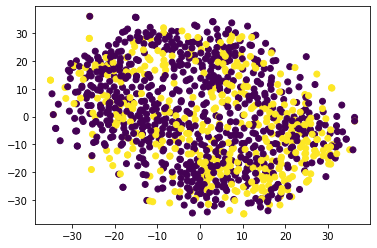

In [23]:
tsne = TSNE(n_components=2)
scaler = StandardScaler()
pred = tsne.fit_transform(scaler.fit_transform(X))
plt.scatter(pred[:, 0], pred[:, 1], c=y)

Principle Component Analysis prediction | Dimensionality reduction

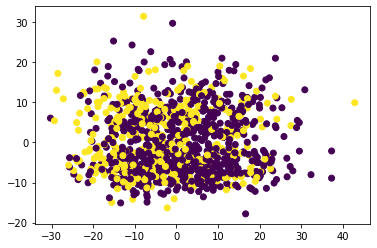

In [24]:
pca = PCA(n_components=2)

scaler = StandardScaler()
pred = pca.fit_transform(scaler.fit_transform(X))
plt.scatter(pred[:, 0], pred[:, 1], c=y)

# Using several models | scores | mean | std

1st Model XGBClassifier

In [25]:
model = XGBClassifier(random_state = 32)
scaler = StandardScaler()
result = cross_val_score(model, scaler.fit_transform(X), y, cv=5, scoring='balanced_accuracy')

In [26]:
print(result)
print('mean: {:.3f}, std: {:.3f}'.format(np.mean(result), np.std(result)))

[0.61124297 0.59225563 0.62731643 0.60728512 0.68172966]
mean: 0.624, std: 0.031


2nd Model: ExtraTreesClassifier

In [27]:
model = ExtraTreesClassifier(random_state=32)
scaler = StandardScaler()
result = cross_val_score(model, scaler.fit_transform(X), y, cv=5, scoring='balanced_accuracy')
print(result)
print('mean: {:.3f}, std: {:.3f}'.format(np.mean(result), np.std(result)))

[0.56021449 0.57797117 0.57478147 0.5767903  0.56346818]
mean: 0.571, std: 0.007


3rd Model: RandomForestClassifier

In [28]:
model = RandomForestClassifier(random_state=32)
scaler = StandardScaler()
result = cross_val_score(model, scaler.fit_transform(X), y, cv=5, scoring='balanced_accuracy')
print(result)
print('mean: {:.3f}, std: {:.3f}'.format(np.mean(result), np.std(result)))

[0.55265471 0.59818917 0.57128497 0.56063557 0.57196601]
mean: 0.571, std: 0.015


Highest correlation with respect to Gender to see who was mostly concerned with the different volumes of the MRI dataset
* X['Gender'] = 1 -> This is male 
* X['Gender'] = 0 -> This is female

Let's Male corrolations to the database

In [29]:
corrolation = X.corr() 
corrolation['Gender'] = 1
corrolation.head(5)

,Gender,FS_InterCranial_Vol,FS_BrainSeg_Vol,FS_BrainSeg_Vol_No_Vent,FS_BrainSeg_Vol_No_Vent_Surf,FS_LCort_GM_Vol,FS_RCort_GM_Vol,FS_TotCort_GM_Vol,FS_SubCort_GM_Vol,FS_Total_GM_Vol,...,FS_R_Rostralanteriorcingulate_CurvInd,FS_R_Rostralmiddlefrontal_CurvInd,FS_R_Superiorfrontal_CurvInd,FS_R_Superiorparietal_CurvInd,FS_R_Superiortemporal_CurvInd,FS_R_Supramarginal_CurvInd,FS_R_Frontalpole_CurvInd,FS_R_Temporalpole_CurvInd,FS_R_Transversetemporal_CurvInd,FS_R_Insula_CurvInd
Gender,1,0.620516,0.646454,0.642130,0.642249,0.603384,0.612174,0.610203,0.580532,0.644258,...,0.025881,0.206317,0.109987,0.150766,0.190469,0.187126,0.086284,0.162287,0.056155,-0.022247
FS_InterCranial_Vol,1,1.000000,0.897758,0.889782,0.889812,0.840017,0.843915,0.845278,0.788514,0.875130,...,0.052883,0.227997,0.095836,0.199910,0.199611,0.241742,0.106895,0.134140,0.024067,0.008896
FS_BrainSeg_Vol,1,0.897758,1.000000,0.998327,0.998339,0.944816,0.948272,0.950262,0.868994,0.966484,...,0.043740,0.248913,0.096576,0.185906,0.233492,0.263168,0.094319,0.136816,0.034478,0.022590
FS_BrainSeg_Vol_No_Vent,1,0.889782,0.998327,1.000000,0.999992,0.945385,0.949133,0.950982,0.870565,0.966679,...,0.044100,0.248276,0.097804,0.184166,0.231987,0.261687,0.093072,0.135427,0.033502,0.024369
FS_BrainSeg_Vol_No_Vent_Surf,1,0.889812,0.998339,0.999992,1.000000,0.945340,0.949120,0.950952,0.870486,0.966661,...,0.044200,0.248133,0.097733,0.184214,0.231964,0.261660,0.092971,0.135365,0.033526,0.024253


Female corrolation regarding to the database

In [30]:
corrolation = X.corr() 
corrolation['Gender'] = 0
corrolation.head(5)

,Gender,FS_InterCranial_Vol,FS_BrainSeg_Vol,FS_BrainSeg_Vol_No_Vent,FS_BrainSeg_Vol_No_Vent_Surf,FS_LCort_GM_Vol,FS_RCort_GM_Vol,FS_TotCort_GM_Vol,FS_SubCort_GM_Vol,FS_Total_GM_Vol,...,FS_R_Rostralanteriorcingulate_CurvInd,FS_R_Rostralmiddlefrontal_CurvInd,FS_R_Superiorfrontal_CurvInd,FS_R_Superiorparietal_CurvInd,FS_R_Superiortemporal_CurvInd,FS_R_Supramarginal_CurvInd,FS_R_Frontalpole_CurvInd,FS_R_Temporalpole_CurvInd,FS_R_Transversetemporal_CurvInd,FS_R_Insula_CurvInd
Gender,0,0.620516,0.646454,0.642130,0.642249,0.603384,0.612174,0.610203,0.580532,0.644258,...,0.025881,0.206317,0.109987,0.150766,0.190469,0.187126,0.086284,0.162287,0.056155,-0.022247
FS_InterCranial_Vol,0,1.000000,0.897758,0.889782,0.889812,0.840017,0.843915,0.845278,0.788514,0.875130,...,0.052883,0.227997,0.095836,0.199910,0.199611,0.241742,0.106895,0.134140,0.024067,0.008896
FS_BrainSeg_Vol,0,0.897758,1.000000,0.998327,0.998339,0.944816,0.948272,0.950262,0.868994,0.966484,...,0.043740,0.248913,0.096576,0.185906,0.233492,0.263168,0.094319,0.136816,0.034478,0.022590
FS_BrainSeg_Vol_No_Vent,0,0.889782,0.998327,1.000000,0.999992,0.945385,0.949133,0.950982,0.870565,0.966679,...,0.044100,0.248276,0.097804,0.184166,0.231987,0.261687,0.093072,0.135427,0.033502,0.024369
FS_BrainSeg_Vol_No_Vent_Surf,0,0.889812,0.998339,0.999992,1.000000,0.945340,0.949120,0.950952,0.870486,0.966661,...,0.044200,0.248133,0.097733,0.184214,0.231964,0.261660,0.092971,0.135365,0.033526,0.024253


Let's see the highest corrolation to both genders

In [31]:
highest_corr = corrolation.drop('Gender', axis=0)['Gender'].idxmax()
highest_corr

'FS_InterCranial_Vol'

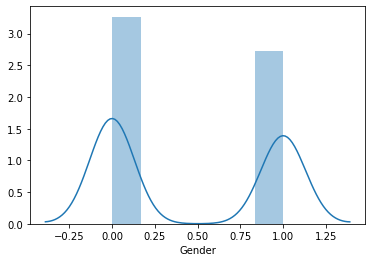

In [32]:
sns.distplot(X['Gender'])

In [33]:
#As we can see from the graph that women had the highest corrolation regarding to our database

First splitting the database 

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=45)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [35]:
model = XGBClassifier(random_state=32)
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=32, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [37]:
pred = model.predict(scaler.transform(X_test))
print(accuracy_score(Y_test, pred))
print(balanced_accuracy_score(Y_test, pred))
np.unique(Y_test, return_counts=True)

0.6636771300448431
0.591024964838256


(array([False,  True]), array([144,  79], dtype=int64))

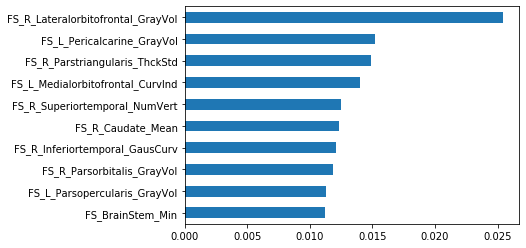

In [38]:
pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)[-10:].plot(kind='barh')

Precision/Recall results

In [39]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

# Use label_binarize to be multi-label like settings
Y = label_binarize(y, classes=[0, 1, 2])
n_classes = Y.shape[1]

# Split into training and test that will be working with the label binarize
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5)


# We use OneVsRestClassifier for multi-label prediction
from sklearn.multiclass import OneVsRestClassifier

# Run classifier
classifier = OneVsRestClassifier(svm.LinearSVC())
classifier.fit(X_train, Y_train)
y_score = classifier.decision_function(X_test)

C:\Users\KODIRJON\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\KODIRJON\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\KODIRJON\Anaconda3\lib\site-packages\sklearn\multiclass.py:75: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))


In [40]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.63


C:\Users\KODIRJON\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.63')

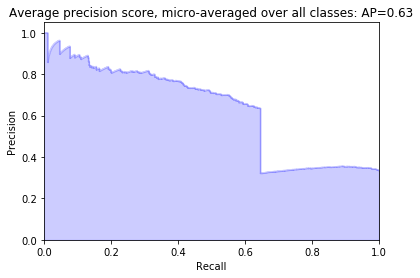

In [41]:
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

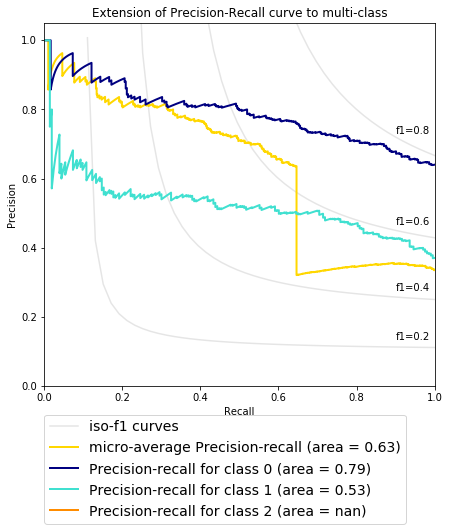

In [42]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))

plt.show()

# Dimensionality reduction 2 | Auto encoders

In [43]:
# Just to see the device and memory checking
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7943459053947546187
]


In [45]:
# Splitting our database for our AutoEncoder implementation

xtr00, xte0, ytr0, yte0 = train_test_split(pd.DataFrame(x), pd.DataFrame(y), test_size=0.2, random_state=42)
ytr = ytr0.sort_values(by = [0])
xtr0 = xtr00.reindex(ytr.index)
ytr = ytr.values
yte = yte0.values
ytr[ytr == 0] = -1
yte[yte == 0] = -1

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
xtr = pd.DataFrame(scaler.fit_transform(xtr0.values))
xte = pd.DataFrame(scaler.transform(xte0))

Autoencoder function

In [47]:
def ae_arch_0(encoding_dim, epochs, bachs, l1_reg, l2_reg, lrate, xtr, xte): 
    earlstop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10,  mode='auto', baseline=None, restore_best_weights=False, verbose=1)
    rlrop = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', min_delta=0.001, patience=10, verbose=1, mode='auto')
    # Optimizer
    optim = keras.optimizers.Adam(lr=lrate)
    #Architercture
    # INPUT
    inputdim = Input(shape=(xtr.shape[1],))
    
    # DENSE LAYER
    encode_i = Dense(20, kernel_regularizer=regularizers.l2(l2_reg), activation = 'relu')(inputdim)
    
    # BATCH NORM
    bn_i = BatchNormalization()(encode_i)
    
    # DENSE LAYER
    encode_ii = Dense(10, activation = 'relu')(bn_i)

    latent = Dense(encoding_dim, kernel_regularizer = regularizers.l2(l2_reg), activation = 'relu')(encode_ii)

    # DECODER
    decode_i = Dense(10, activation = 'relu')(latent)
    decode_ii = Dense(20,activation='relu')(decode_i)
    
    # DECODER
    decode_iii = Dense(xtr.shape[1],activation='sigmoid')(decode_ii)
    
    # AUTOENCODER
    autoencoder = Model(inputdim, decode_iii)
    encoder = Model(inputdim, latent)
    
    #encoded_input5 = Input(shape=(encoding_dim5,))
    #decoder_layer5 = autoencoder5.layers[-3]
    #decoder5 = Model(x3, decoder_layer5(x3))

    autoencoder.summary()
    compression_factor = float(np.shape(xtr)[1]) / encoding_dim
    print("Compression factor: %s" % compression_factor)

    autoencoder.compile(optimizer=optim, loss='binary_crossentropy')
    autoencoder.fit(xtr, xtr,epochs=epochs, batch_size=bachs,  shuffle=True,  validation_data=(xte, xte), callbacks = [earlstop, rlrop])
    
    histval = autoencoder.history.history['val_loss']
    histtra = autoencoder.history.history['loss']
    
    return encoder, histtra, histval

Training an autoencoder model. Store the encoder function and the training loss scores.

In [48]:
encoder_val, histtra_val, histval_val = ae_arch_0(5,50,32,0, 0.0005, 0.001, xtr, xte)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                40        
_________________________________________________________________
batch_normalization_1 (Batch (None, 20)                80        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_5 (Dense)              (None, 20)                220 

Plot the training and validation Loss.

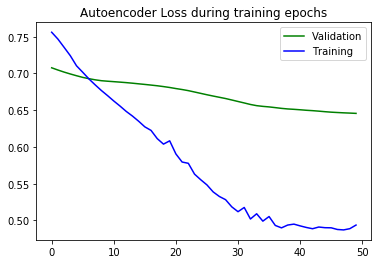

In [49]:
plt.plot(histval_val, c = 'g', label = "Validation")
plt.plot(histtra_val, c = 'b', label = "Training")
plt.title("Autoencoder Loss during training epochs")
plt.legend()
plt.show()

# Here we will visualize the decomposition, to observe how the data diverges across different manofild learning methods. We will compare `PCA`, `ICA` and `Isomap` non-linear decompositions 


In [50]:
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import colorlover as cl

init_notebook_mode(connected=True)

In [51]:
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import Isomap
import pandas as pd

pca = PCA(n_components=3)
pca_tr_data = pca.fit_transform(X)
S_pca_ = StandardScaler().fit_transform(pca_tr_data)

In [52]:
digits_3d = pd.DataFrame({
    'x': S_pca_[:, 0], 
    'y': S_pca_[:, 1], 
    'z': S_pca_[:, 2],
    'label': X['Gender'],
})

colors = cl.scales['10']['qual']['Paired']
data = []

for i in range(10):
    x = digits_3d[digits_3d['label'].astype('int') == i]['x']
    y = digits_3d[digits_3d['label'].astype('int') == i]['y']
    z = digits_3d[digits_3d['label'].astype('int') == i]['z']
    
    color = colors[i]
    
    trace = {
        'name': str(i),
        'x': x,
        'y': y,
        'z': z,
        'type': 'scatter3d',
        'mode': 'markers',
        'marker': {
            'size': 5,
            'color': color 
        }
    }
    data.append(trace)

layout = go.Layout(
    title='MNIST visualization PCA',
    width=900,
    height=600
)

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link = False)

In [53]:
#Start of the soution for finding the accuracy 
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.manifold import Isomap
from sklearn.decomposition import FastICA, PCA
from sklearn.preprocessing import StandardScaler


logreg = LogisticRegression(solver='lbfgs',multi_class='multinomial')
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
digits = datasets.load_digits()
data2 = StandardScaler().fit_transform(digits.data)
scores=list([] for i in range(3))
comp = 7
itr = 5000
labels = digits.target
std = [0.0,0.0,0.0]
mean = [0.0,0.0,0.0]
methods = {'PCA': PCA(n_components=comp), 'ICA': FastICA(n_components=comp, max_iter = itr), 'Isomap': Isomap(n_components=comp, max_iter = itr)}
df = [methods['PCA'].fit_transform(data2), methods['ICA'].fit_transform(data2),methods['Isomap'].fit_transform(data2)]
for i in range(len(df)):
    for train_index, test_index in rkf.split(df[i]):
        X_train, X_test = df[i][train_index], df[i][test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        logreg.fit(X_train, y_train)
        scores[i].append(logreg.score(X_test, y_test))
    std[i]= np.std(scores[i])
    mean[i] = np.mean(scores[i])
temp = pd.DataFrame({
        "dim.reduction method": list(methods.keys()),
        "mean accuracy": mean,
        "std": std
    })
temp

C:\Users\KODIRJON\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\KODIRJON\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\KODIRJON\Anaconda3\lib\site

C:\Users\KODIRJON\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\KODIRJON\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\KODIRJON\Anaconda3\lib\site

,dim.reduction method,mean accuracy,std
0,PCA,0.856430,0.020212
1,ICA,0.682628,0.032132
2,Isomap,0.952139,0.008411


In [54]:
from scipy.stats import ttest_ind
value, pvalue = ttest_ind(scores[0], scores[1]) # as its indexes applicable like PCA - > 0 and ICA -> 1 etc
if ((pvalue < 0.005) and (value > 0)):
    print("Statistically significant improvement of PCA decomposition over ICA: p-value {0}".format(pvalue))

Statistically significant improvement of PCA decomposition over ICA: p-value 2.254378010246895e-16


In [55]:
t2, val2 = ttest_ind(scores[2], scores[0])
print('Statistically significant improvement of Isomap decomposition over PCA: p-value ', val2)

Statistically significant improvement of Isomap decomposition over PCA: p-value  7.333450356741744e-16


To sum up, we could say that Isomap has done better to do this task, as we have looked at huge data that has intrinsic dimensionality. And the predominant aim of this part of the assignment is to see the linear and non-linear dimensionality reductions, as ICA and PCA stands for linear, and Isomap is non-linear respectively.   